In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, mean_squared_error

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.metrics import classification_report_imbalanced

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from imblearn.under_sampling import NearMiss

### Read unbalanced data (Multiclass)

In [ ]:
file = 'Datasets/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file)
df

In [ ]:
df.columns = df.columns.str.lower().str.replace('_012','')

In [ ]:
df.columns

In [ ]:
df.info()

### DecisionTree Classifier

### Multiclass Imbalanced data - Manually balanced

In [175]:
def getRandomDF(df, value, n, state):
    return df[df.diabetes==value].sample(n=n, random_state=state)

In [176]:
dfs = {}
size = df.diabetes.value_counts()[1.0]
print(f'Size: {size}')

# Data for diabetes == 1
df1 = df[df.diabetes==1].sample(n=size)

# Get 10 random balanced dataframes. 
# The most imbalanced class (1) determines the total number of samples 4,361 * 3 = 13,893
for i in range(0,10):
    df0 = getRandomDF(df, 0, size, i)
    #df2 = getRandomDF(df, 2, size, i)
    dfs[i] = pd.concat([df0, df1])

Size: 35346


#### List of models

In [17]:
models = [DecisionTreeClassifier(),
         RandomForestClassifier()]

Val prediction: [0. 0. 0. ... 0. 0. 0.]
Val RMSE: 0.5185955292151788
Val AUC: 0.7303384492854754
Test prediction: [0. 0. 0. ... 0. 1. 1.]
Test RMSE: 0.5171231633563109
Test AUC: 0.7317847357961512
Train prediction: [0. 0. 1. ... 1. 1. 1.]
Train RMSE: 0.4780790447020975
Train AUC: 0.7716913120517606
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      8689
         1.0       0.72      0.77      0.75      8984

    accuracy                           0.73     17673
   macro avg       0.73      0.73      0.73     17673
weighted avg       0.73      0.73      0.73     17673

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.69      0.77      0.72      0.73      0.53      8689
        1.0       0.72      0.77      0.69      0.75      0.73      0.54      8984

avg / total       0.73      0.73      0.73      0.73      0.73      0.53     17673

Val prediction: [0. 1. 0. ... 0. 0. 0.

Val prediction: [1. 1. 0. ... 0. 1. 0.]
Val RMSE: 0.5159154310194772
Val AUC: 0.7335707755431748
Test prediction: [1. 1. 0. ... 1. 1. 1.]
Test RMSE: 0.5154793239757492
Test AUC: 0.733955660000372
Train prediction: [0. 1. 1. ... 1. 1. 1.]
Train RMSE: 0.4805973385742182
Train AUC: 0.7691200313681941
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      8777
         1.0       0.72      0.77      0.74      8896

    accuracy                           0.73     17673
   macro avg       0.74      0.73      0.73     17673
weighted avg       0.73      0.73      0.73     17673

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.69      0.77      0.72      0.73      0.53      8777
        1.0       0.72      0.77      0.69      0.74      0.73      0.54      8896

avg / total       0.73      0.73      0.73      0.73      0.73      0.54     17673



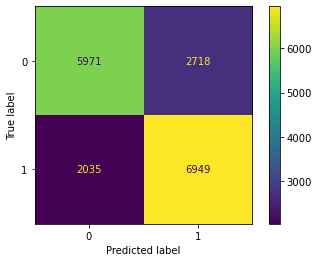

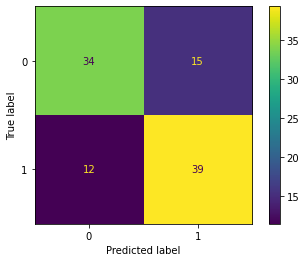

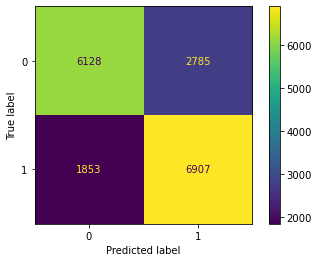

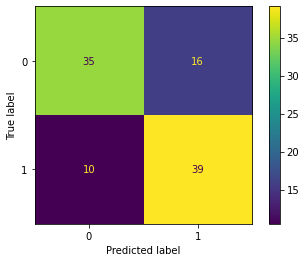

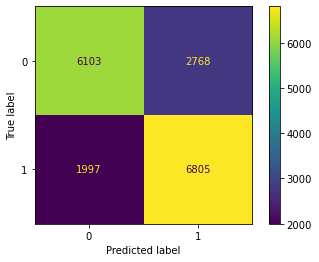

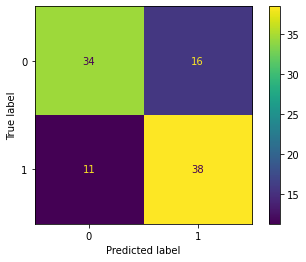

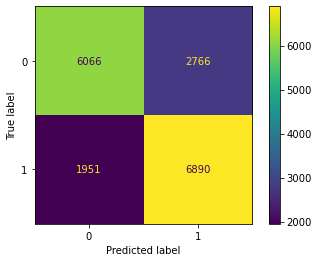

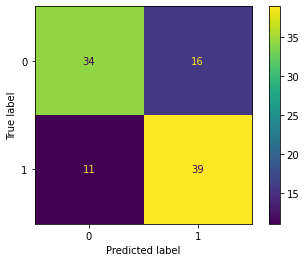

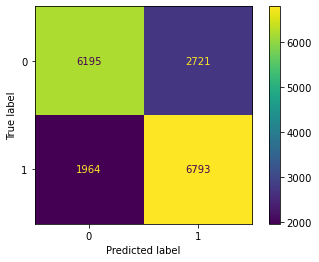

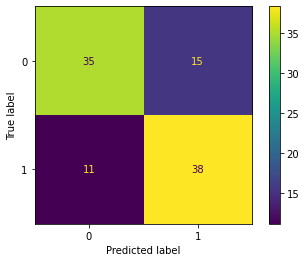

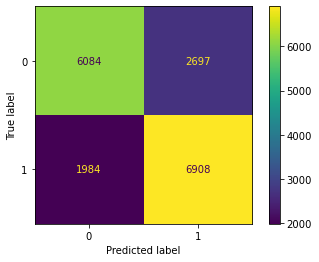

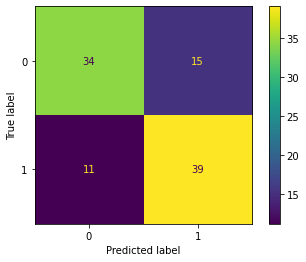

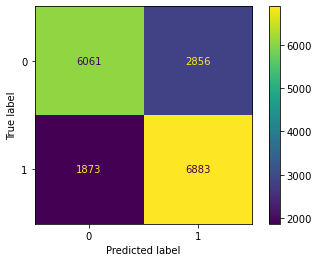

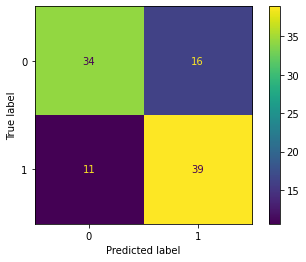

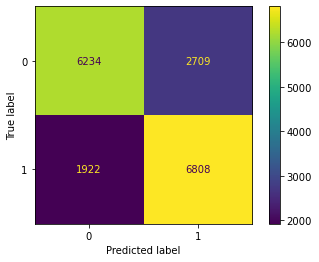

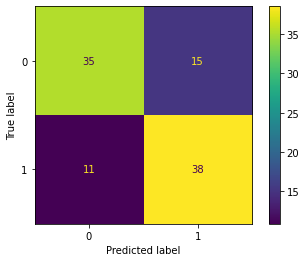

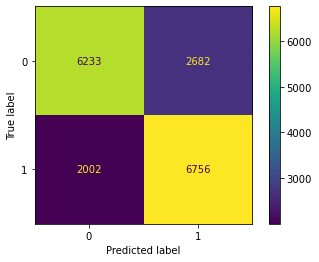

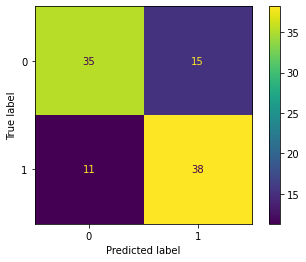

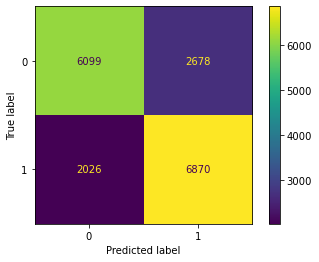

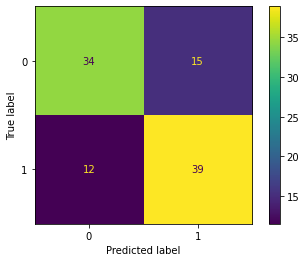

In [179]:
for i,j in dfs.items():
    model = make_pipeline(DecisionTreeClassifier(max_depth=10))
    
    target = j.diabetes
    data = j.drop(columns=['diabetes'])
    
    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=i)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=i)
    model.fit(dfTrain, yTrain)
    #yValPred = model.predict_proba(dfVal)[:,1]
    yValPred = model.predict(dfVal)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Val prediction: {yValPred}')
    print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
    print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')
    
    yTestPred = model.predict(dfTest)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Test prediction: {yTestPred}')
    print(f'Test RMSE: {mean_squared_error(yTest, yTestPred,squared=False)}')
    print(f'Test AUC: {roc_auc_score(yTest, yTestPred)}')

    #yTrainPred = model.predict_proba(dfTrain)[:,1]
    yTrainPred = model.predict(dfTrain)#[:,1]
    #yTrainPred = np.argmax(resdfValPred, axis=1)
    print(f'Train prediction: {yTrainPred}')
    print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
    print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')
    
    cm = confusion_matrix(yVal, yValPred)
    cmprob = np.round(100 * cm / len(yVal), 1)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
    cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
    
    print(classification_report(yVal, yValPred))
    print(classification_report_imbalanced(yVal, yValPred))

In [ ]:
for i,j in dfs.items():
    model = make_pipeline(RandomForestClassifier(n_estimators=10, random_state=1, max_depth=7))
    
    target = j.diabetes
    data = j.drop(columns=['diabetes'])
    
    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=i)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=i)
    model.fit(dfTrain, yTrain)
    #yValPred = model.predict_proba(dfVal)[:,1]
    yValPred = model.predict(dfVal)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Val prediction: {yValPred}')
    print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
    print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

    #yTrainPred = model.predict_proba(dfTrain)[:,1]
    yTrainPred = model.predict(dfTrain)#[:,1]
    #yTrainPred = np.argmax(resdfValPred, axis=1)
    print(f'Train prediction: {yTrainPred}')
    print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
    print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')
    
    cm = confusion_matrix(yVal, yValPred)
    cmprob = np.round(100 * cm / len(yVal), 1)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
    cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
    
    print(classification_report(yVal, yValPred))
    print(classification_report_imbalanced(yVal, yValPred))

Val prediction: [0. 1. 1. ... 1. 0. 0.]
Val RMSE: 0.5079016893730649
Val AUC: 0.742013427305464
Train prediction: [1. 1. 1. ... 1. 1. 1.]
Train RMSE: 0.5041089955572345
Train AUC: 0.7458826036595905
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     17651
         1.0       0.73      0.76      0.75     17695

    accuracy                           0.74     35346
   macro avg       0.74      0.74      0.74     35346
weighted avg       0.74      0.74      0.74     35346

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.72      0.76      0.74      0.74      0.55     17651
        1.0       0.73      0.76      0.72      0.75      0.74      0.55     17695

avg / total       0.74      0.74      0.74      0.74      0.74      0.55     35346

Val prediction: [1. 0. 0. ... 1. 1. 0.]
Val RMSE: 0.5015395299211803
Val AUC: 0.7485677635308188
Train prediction: [0. 0. 0. ... 0. 1. 1.]


                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.72      0.77      0.74      0.74      0.55     17731
        1.0       0.73      0.77      0.72      0.75      0.74      0.56     17615

avg / total       0.75      0.74      0.74      0.74      0.74      0.55     35346



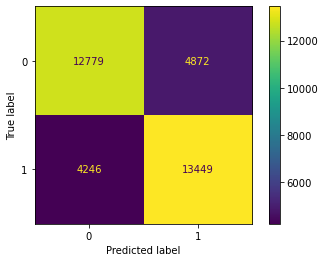

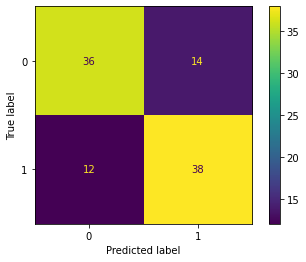

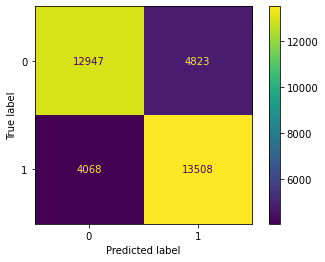

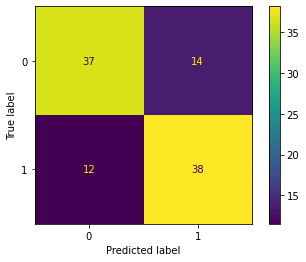

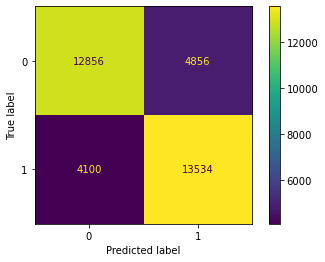

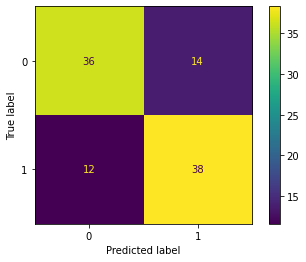

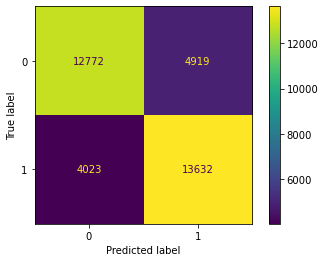

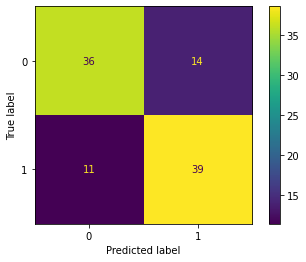

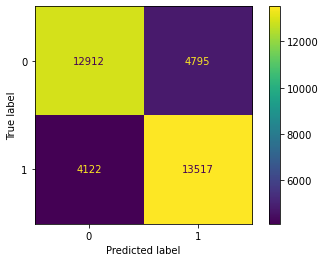

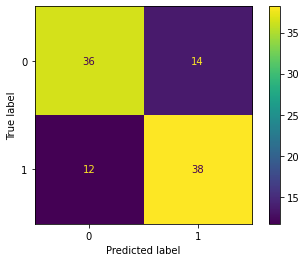

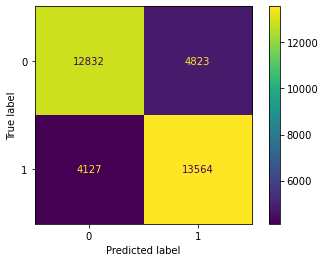

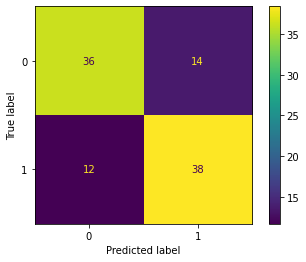

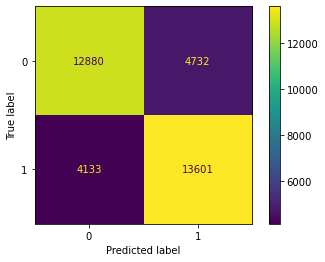

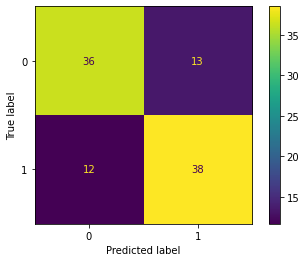

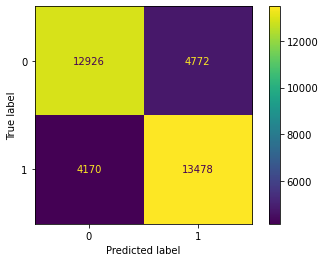

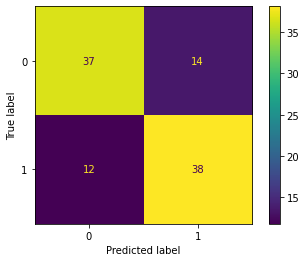

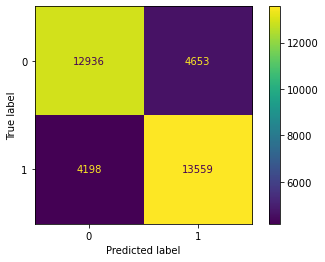

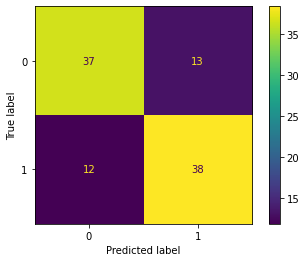

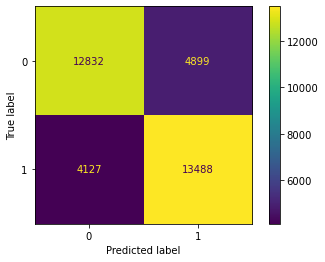

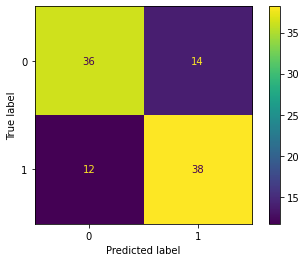

In [19]:
for i,j in dfs.items():
    model = make_pipeline(LogisticRegression(max_iter=1000))
    
    target = j.diabetes
    data = j.drop(columns=['diabetes'])
    
    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=i)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=i)
    model.fit(dfTrain, yTrain)
    #yValPred = model.predict_proba(dfVal)[:,1]
    yValPred = model.predict(dfVal)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Val prediction: {yValPred}')
    print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
    print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

    #yTrainPred = model.predict_proba(dfTrain)[:,1]
    yTrainPred = model.predict(dfTrain)#[:,1]
    #yTrainPred = np.argmax(resdfValPred, axis=1)
    print(f'Train prediction: {yTrainPred}')
    print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
    print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')
    
    cm = confusion_matrix(yVal, yValPred)
    cmprob = np.round(100 * cm / len(yVal), 1)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
    cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
    
    print(classification_report(yVal, yValPred))
    print(classification_report_imbalanced(yVal, yValPred))

In [20]:
yTestPred = model.predict(dfTest)
yTestPred

array([1., 0., 1., ..., 1., 1., 1.])

In [21]:
print(f'Val prediction: {yTestPred}')
print(f'Val RMSE: {mean_squared_error(yTest, yTestPred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yTest, yTestPred)}')

Val prediction: [1. 0. 1. ... 1. 1. 1.]
Val RMSE: 0.5067357590893984
Val AUC: 0.7432806524749227


In [26]:
print(classification_report(yTest, model.predict(dfTest)))
print(classification_report_imbalanced(yTest, model.predict(dfTest)))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     14181
         1.0       0.73      0.76      0.75     14096

    accuracy                           0.74     28277
   macro avg       0.74      0.74      0.74     28277
weighted avg       0.74      0.74      0.74     28277

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.72      0.76      0.74      0.74      0.55     14181
        1.0       0.73      0.76      0.72      0.75      0.74      0.55     14096

avg / total       0.74      0.74      0.74      0.74      0.74      0.55     28277



In [ ]:
for i,j in dfs.items():
    
    target = j.diabetes
    data = j.drop(columns=['diabetes'])
    
    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=i)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=i)
    
        
    dTrain = xgb.DMatrix(dfTrain, yTrain)#, enable_categorical=True)
    dVal = xgb.DMatrix(dfVal, yVal)#, enable_categorical=True)
    xgbParams = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthreads': 8,
    
    'seed': 1,
    'verbosity': 1,
    }

    model = xgb.train(xgbParams, dTrain, num_boost_round=10)
    
    yValPred = modelxgb.predict(dVal)
    
    #roc_auc_score(yVal, yValPred)
    
    #model.fit(dfTrain, yTrain)
    #yValPred = model.predict_proba(dfVal)[:,1]
    #yValPred = model.predict(dfVal)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Val prediction: {yValPred}')
    print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
    print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

    #yTrainPred = model.predict_proba(dfTrain)[:,1]
    #yTrainPred = model.predict(dfTrain)#[:,1]
    yTrainPred = modelxgb.predict(dTrain)
    #yTrainPred = np.argmax(resdfValPred, axis=1)
    print(f'Train prediction: {yTrainPred}')
    print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
    print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')
    
    cm = confusion_matrix(yVal, (yValPred > 0.5).astype(int))
    cmprob = np.round(100 * cm / len(yVal), 1)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
    cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
    
    print(classification_report(yVal, (yValPred > 0.5).astype(int)))
    print(classification_report_imbalanced(yVal, (yValPred > 0.5).astype(int)))


In [ ]:
(yValPred > 0.5)*1.0

In [ ]:
yValPred.dtype

### Random Forest

In [ ]:
RF = make_pipeline(RandomForestClassifier(n_estimators=10, random_state=1, max_depth=6))
RF.fit(dfTrain, yTrain)

In [ ]:
yValPred = RF.predict_proba(dfVal)[:,1]

In [ ]:
roc_auc_score(yVal, yValPred)

In [ ]:
print(classification_report(yVal, RF.predict(dfVal)))
print(classification_report_imbalanced(yVal, RF.predict(dfVal)))

In [ ]:
for param in RF.get_params():
    print(param)

### All imbalanced data

In [ ]:
dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)

In [ ]:
# creating the model
from sklearn.pipeline import make_pipeline
#model = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30))
model = make_pipeline(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30))


model.fit(dfTrain, yTrain)

In [ ]:
resdfVal = model.predict_proba(dfVal)#[:,1]
yValPred = np.argmax(resdfVal, axis=1)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')

resdfValPred = model.predict_proba(dfTrain)#[:,1]
yTrainPred = np.argmax(resdfValPred, axis=1)
print(f'Train prediction: {yTrainPred}')
print(f'Val RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')

In [ ]:
cm = confusion_matrix(yVal, yValPred)
cmprob = np.round(100 * cm / len(yVal), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
print(classification_report_imbalanced(yVal, model.predict(dfVal)))
#tn, fp, fn, tp = cm.ravel()
#print(tn, fp, fn, tp)
#print(cm)

In [ ]:
print(classification_report(yVal, yValPred))

In [ ]:
import seaborn as sns
corr = df.corr()
#sns.set_theme()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
corr = df[numericalCols + ['diabetes']].corr()
#sns.set_theme()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="Blues", annot=True)

### Binary Unbalanced Data

In [142]:
file = 'Datasets/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [143]:
df.columns = df.columns.str.lower().str.replace('diabetes_binary','diabetes')
df.columns

Index(['diabetes', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

In [144]:
target = df.diabetes
data = df.drop(columns=['diabetes'])

In [145]:
dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)

### EDA

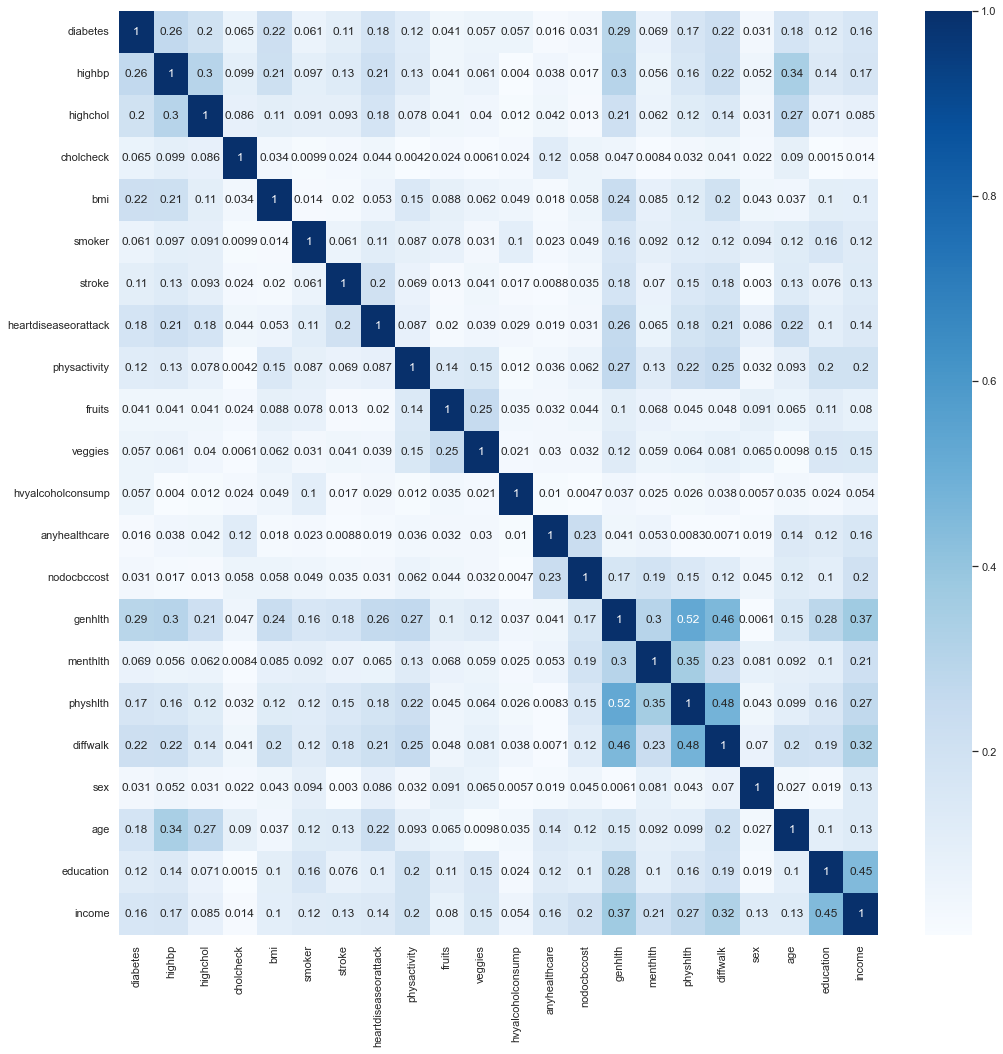

In [191]:
#sns.set_theme()
corr_matrix = df.corr().abs()
plt.figure(figsize=(17,17))

_ = sns.heatmap(corr_matrix, cmap="Blues", annot=True)

### Preprocessing

In [ ]:
categoricalCols = ['highbp', 'highchol', 'cholcheck','smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth','diffwalk', 'sex', 'education']

numericalCols = ['bmi', 'menthlth', 'physhlth', 'income']

In [ ]:
#dfTrain.income = np.log1p(dfTrain.income)

In [ ]:
# creating preprocesors
from sklearn.preprocessing import OneHotEncoder, StandardScaler
catPreprocessor = OneHotEncoder(handle_unknown="ignore")
numPreprocessor = StandardScaler()

# Transforming the data
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    #('one-hot-encoder', catPreprocessor, categoricalCols)],remainder="passthrough")
    #('one-hot-encoder', catPreprocessor, categoricalCols),('standard_scaler', numPreprocessor, numericalCols)])
    ], remainder="passthrough")


### DecisionTreeClassifier

In [146]:
# creating the model
from sklearn.pipeline import make_pipeline
model = make_pipeline(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30))

model.fit(dfTrain, yTrain)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30))])

In [147]:

yValPred = model.predict_proba(dfVal)[:,1]
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
auc = roc_auc_score(yVal, yValPred)
print(auc)

yTrainPred = model.predict_proba(dfTrain)[:,1]
print(f'Train prediction: {yTrainPred}')
print(f'Val RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
auc = roc_auc_score(yTrain, yTrainPred)
print(auc)


Val prediction: [0.06734993 0.19215605 0.32271892 ... 0.05915408 0.01766    0.45981982]
Val RMSE: 0.31997518188244967
0.7996756487074186
Train prediction: [0.32518043 0.32271892 0.04501796 ... 0.05915408 0.26225422 0.06734993]
Val RMSE: 0.3145962211411061
0.806406095774206


In [148]:
print(classification_report(yVal, model.predict(dfVal)))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92     54385
         1.0       0.58      0.09      0.16      9035

    accuracy                           0.86     63420
   macro avg       0.73      0.54      0.54     63420
weighted avg       0.83      0.86      0.82     63420



In [39]:
yValPred = model.predict_proba(dfVal)#[:,1]
yValPred

array([[0.93265007, 0.06734993],
       [0.80784395, 0.19215605],
       [0.67728108, 0.32271892],
       ...,
       [0.94084592, 0.05915408],
       [0.98234   , 0.01766   ],
       [0.54018018, 0.45981982]])

In [40]:
roc_auc_score(yVal,yValPred[:,1])

0.7996756487074186

### Logistic Regression

In [112]:
#model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))    
model = make_pipeline(LogisticRegression(max_iter=1000))    

#model.fit(dfTrain[0:size], yTrain[0:size])
model.fit(dfTrain, yTrain)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=1000))])

In [113]:
yValPredProba = model.predict_proba(dfVal)[:,1]
yValPred = model.predict(dfVal)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
auc = roc_auc_score(yVal, yValPred)
print(auc)

yTrainPredProba = model.predict_proba(dfTrain)[:,1]
yTrainPred = model.predict(dfTrain)
print(f'Train prediction: {yTrainPred}')
print(f'Val RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
auc = roc_auc_score(yTrain, yTrainPred)
print(auc)

Val prediction: [0. 0. 0. ... 0. 0. 0.]
Val RMSE: 0.373917021303606
0.5654576283104039
Train prediction: [0. 0. 0. ... 0. 0. 0.]
Val RMSE: 0.3678159220413053
0.5677579288969901


In [114]:
print(classification_report(yVal, yValPred))

print(classification_report_imbalanced(yVal, model.predict(dfVal)))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     54385
         1.0       0.53      0.15      0.24      9035

    accuracy                           0.86     63420
   macro avg       0.70      0.57      0.58     63420
weighted avg       0.83      0.86      0.83     63420

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.87      0.98      0.15      0.92      0.39      0.16     54385
        1.0       0.53      0.15      0.98      0.24      0.39      0.14      9035

avg / total       0.83      0.86      0.27      0.83      0.39      0.16     63420



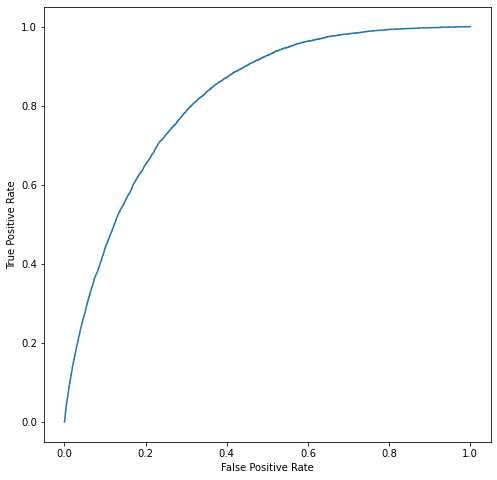

In [111]:
from sklearn.metrics import roc_curve, RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 8))
fpr, tpr, _ = roc_curve(yVal.values, yValPredProba)
roc_display1 = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax)
#fpr2, tpr2, _ = roc_curve(yVal, targetRand)
#roc_display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax)

plt.show()

### Logistic Regression 2

In [115]:
#model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))    
model = make_pipeline(LogisticRegression(max_iter=1000, class_weight='balanced'))    

#model.fit(dfTrain[0:size], yTrain[0:size])
model.fit(dfTrain, yTrain)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [116]:
yValPredProba = model.predict_proba(dfVal)[:,1]
yValPred = model.predict(dfVal)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
auc = roc_auc_score(yVal, yValPred)
print(auc)

yTrainPredProba = model.predict_proba(dfTrain)[:,1]
yTrainPred = model.predict(dfTrain)
print(f'Train prediction: {yTrainPred}')
print(f'Val RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
auc = roc_auc_score(yTrain, yTrainPred)
print(auc)

Val prediction: [0. 1. 1. ... 0. 0. 1.]
Val RMSE: 0.5205490394076778
0.7417294373636811
Train prediction: [1. 1. 0. ... 0. 1. 0.]
Val RMSE: 0.5170233557835983
0.7469379382704594


In [117]:
print(classification_report(yVal, yValPred))

print(classification_report_imbalanced(yVal, model.predict(dfVal)))

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     54385
         1.0       0.31      0.76      0.44      9035

    accuracy                           0.73     63420
   macro avg       0.63      0.74      0.63     63420
weighted avg       0.86      0.73      0.77     63420

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.95      0.72      0.76      0.82      0.74      0.55     54385
        1.0       0.31      0.76      0.72      0.44      0.74      0.55      9035

avg / total       0.86      0.73      0.75      0.77      0.74      0.55     63420



### Random Forest

In [41]:
RF = make_pipeline(RandomForestClassifier(n_estimators=10, random_state=1, max_depth=6))
RF.fit(dfTrain, yTrain)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, n_estimators=10,
                                        random_state=1))])

In [42]:
yValPred = RF.predict_proba(dfVal)[:,1]

In [43]:
roc_auc_score(yVal, yValPred)

0.8110743429358183

In [44]:
print(classification_report(yVal, RF.predict(dfVal)))
print(classification_report_imbalanced(yVal, RF.predict(dfVal)))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92     54385
         1.0       0.65      0.02      0.03      9035

    accuracy                           0.86     63420
   macro avg       0.75      0.51      0.48     63420
weighted avg       0.83      0.86      0.80     63420

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.86      1.00      0.02      0.92      0.13      0.02     54385
        1.0       0.65      0.02      1.00      0.03      0.13      0.01      9035

avg / total       0.83      0.86      0.16      0.80      0.13      0.02     63420



### XGBoost

[12:32:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Val prediction: [0.45637792 0.47453985 0.4898966  ... 0.46954304 0.45282882 0.49728635]
Val RMSE: 0.47180783755097044
Val AUC: 0.8133193119481262
Train prediction: [0.48324108 0.48347542 0.45864415 ... 0.45851284 0.48049006 0.45452726]
Train RMSE: 0.4708830390158688
Train AUC: 0.8386565791262124
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     54385
         1.0       0.52      0.15      0.24      9035

    accuracy                           0.86     63420
   macro avg       0.70      0.57      0.58     63420
weighted avg  

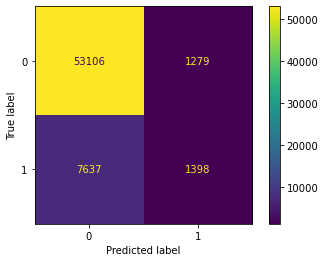

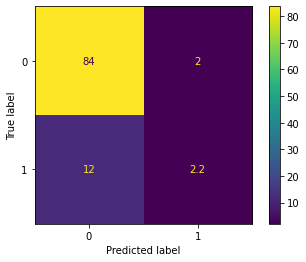

In [47]:
dTrain = xgb.DMatrix(dfTrain, yTrain)#, enable_categorical=True)
dVal = xgb.DMatrix(dfVal, yVal)#, enable_categorical=True)
xgbParams = {
'eta': 0.01,
'max_depth': 10,
'min_child_weight': 1,

'objective': 'binary:logistic',
'nthreads': 8,

'seed': 1,
'verbosity': 1,
}

model = xgb.train(xgbParams, dTrain, num_boost_round=10)

yValPred = model.predict(dVal)

#roc_auc_score(yVal, yValPred)

#model.fit(dfTrain, yTrain)
#yValPred = model.predict_proba(dfVal)[:,1]
#yValPred = model.predict(dfVal)#[:,1]
#yValPred = np.argmax(resdfVal, axis=1)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

#yTrainPred = model.predict_proba(dfTrain)[:,1]
#yTrainPred = model.predict(dfTrain)#[:,1]
yTrainPred = model.predict(dTrain)
#yTrainPred = np.argmax(resdfValPred, axis=1)
print(f'Train prediction: {yTrainPred}')
print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')

cm = confusion_matrix(yVal, (yValPred > 0.5).astype(int))
cmprob = np.round(100 * cm / len(yVal), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(yVal, (yValPred > 0.5).astype(int)))
print(classification_report_imbalanced(yVal, (yValPred > 0.5).astype(int)))


In [ ]:
# creating preprocesors
from sklearn.preprocessing import OneHotEncoder, StandardScaler
catPreprocessor = OneHotEncoder(handle_unknown="ignore")
numPreprocessor = StandardScaler()

# Transforming the data
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ('one-hot-encoder', catPreprocessor, categoricalCols)],remainder="passthrough")
    #('one-hot-encoder', catPreprocessor, categoricalCols),
    #('standard_scaler', numPreprocessor, numericalCols)])
    


In [ ]:
# creating the model
from sklearn.pipeline import make_pipeline
model = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30))

model.fit(dfTrain, yTrain)

In [150]:
target = df.diabetes
data = df.drop(columns=['diabetes'])
#nm = NearMiss()
nm = NearMiss(version = 1 , n_neighbors = 5)

X_res, y_res = nm.fit_resample(data, target)
X_res.shape, y_res.shape

((70692, 21), (70692,))

In [151]:
X_trainFull , X_test , Y_trainFull , Y_test = train_test_split(X_res,y_res, test_size=0.2 , random_state=42)
X_train , X_val , Y_train , Y_val = train_test_split(X_res,y_res, test_size=0.25 , random_state=42)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_val = scalar.fit_transform(X_val)

In [152]:
lg = LogisticRegression(max_iter = 1200)
lg.fit(X_train , Y_train)

# make predictions on test set
y_pred=lg.predict(X_val)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_val, Y_val)))

Training set score: 0.8755
Test set score: 0.8785


Val prediction: [0. 0. 0. ... 1. 0. 1.]
Val RMSE: 0.3486277875308696
Val AUC: 0.8785011376895739
#######
Test prediction: [0. 0. 0. ... 0. 0. 0.]
Test RMSE: 0.3478689429528142
Test AUC: 0.878815748955378
#######
Train prediction: [1. 1. 0. ... 1. 0. 0.]
Train RMSE: 0.35279571213446187
Train AUC: 0.8755233527472707
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      8830
         1.0       0.93      0.82      0.87      8843

    accuracy                           0.88     17673
   macro avg       0.88      0.88      0.88     17673
weighted avg       0.88      0.88      0.88     17673

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.84      0.94      0.82      0.89      0.88      0.78      8830
        1.0       0.93      0.82      0.94      0.87      0.88      0.76      8843

avg / total       0.88      0.88      0.88      0.88      0.88      0.77     17673



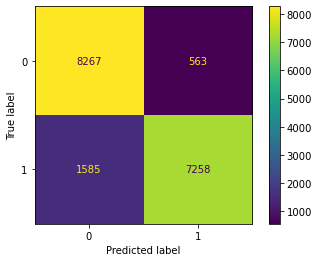

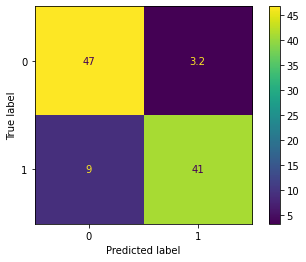

In [157]:
y_pred=lg.predict(X_val)
print(f'Val prediction: {y_pred}')
print(f'Val RMSE: {mean_squared_error(Y_val, y_pred,squared=False)}')
print(f'Val AUC: {roc_auc_score(Y_val,y_pred)}')
print('#######')
y_Testpred=lg.predict(X_test)
print(f'Test prediction: {y_Testpred}')
print(f'Test RMSE: {mean_squared_error(Y_test, y_Testpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(Y_test, y_Testpred)}')
print('#######')
y_predTrain=lg.predict(X_train)
print(f'Train prediction: {y_predTrain}')
print(f'Train RMSE: {mean_squared_error(Y_train, y_predTrain,squared=False)}')
print(f'Train AUC: {roc_auc_score(Y_train,y_predTrain)}')

cm = confusion_matrix(Y_val, y_pred)
cmprob = np.round(100 * cm / len(Y_val), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(Y_val, y_pred))
print(classification_report_imbalanced(Y_val, y_pred))

C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Val prediction: [1. 1. 1. ... 1. 1. 1.]
Val RMSE: 0.9260329662365817
Val AUC: 0.5
#######
Test prediction: [1. 1. 1. ... 1. 1. 1.]
Test RMSE: 0.9260223240755154
Test AUC: 0.5
#######
Train prediction: [1. 1. 1. ... 1. 1. 1.]
Train RMSE: 0.9282835187487117
Train AUC: 0.5
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     54385
         1.0       0.14      1.00      0.25      9035

    accuracy                           0.14     63420
   macro avg       0.07      0.50      0.12     63420
weighted avg       0.02      0.14      0.04     63420

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.00      0.00      1.00      0.00      0.00      0.00     54385
        1.0       0.14      1.00      0.00      0.25      0.00      0.00      9035

avg / total       0.02      0.14      0.86      0.04      0.00      0.00     63420



C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MacCasa\anaconda3\lib\site-packages\skle

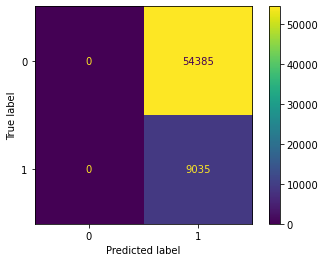

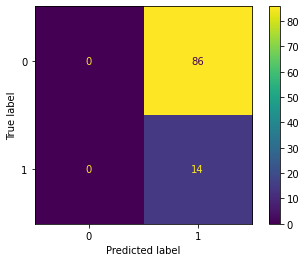

In [161]:
y_pred=lg.predict(dfVal)
print(f'Val prediction: {y_pred}')
print(f'Val RMSE: {mean_squared_error(yVal, y_pred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal, y_pred)}')
print('#######')
y_Testpred=lg.predict(dfTest)
print(f'Test prediction: {y_Testpred}')
print(f'Test RMSE: {mean_squared_error(yTest, y_Testpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, y_Testpred)}')
print('#######')
y_predTrain=lg.predict(dfTrain)
print(f'Train prediction: {y_predTrain}')
print(f'Train RMSE: {mean_squared_error(yTrain, y_predTrain,squared=False)}')
print(f'Train AUC: {roc_auc_score(yTrain,y_predTrain)}')

cm = confusion_matrix(yVal, y_pred)
cmprob = np.round(100 * cm / len(yVal), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(yVal, y_pred))
print(classification_report_imbalanced(yVal, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     26516
         1.0       0.92      0.81      0.86     26503

    accuracy                           0.87     53019
   macro avg       0.88      0.87      0.87     53019
weighted avg       0.88      0.87      0.87     53019

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.83      0.93      0.81      0.88      0.87      0.76     26516
        1.0       0.92      0.81      0.93      0.86      0.87      0.75     26503

avg / total       0.88      0.87      0.87      0.87      0.87      0.76     53019



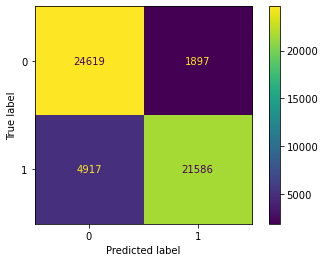

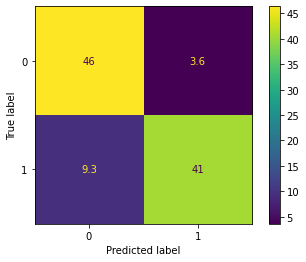

In [110]:
y_pred=lg.predict(X_train)
cm = confusion_matrix(Y_train, y_pred)
cmprob = np.round(100 * cm / len(Y_train), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(Y_train, y_pred))
print(classification_report_imbalanced(Y_train, y_pred))

In [195]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [170]:
target = df.diabetes
data = df.drop(columns=['diabetes'])
#nm = NearMiss()
nm = RandomUnderSampler(random_state=0)

X_res, y_res = nm.fit_resample(data, target)
X_res.shape, y_res.shape

((70692, 21), (70692,))

In [171]:
X_trainFull , X_test , Y_trainFull , Y_test = train_test_split(X_res,y_res, test_size=0.2 , random_state=42)
X_train , X_val , Y_train , Y_val = train_test_split(X_res,y_res, test_size=0.25 , random_state=42)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_val = scalar.fit_transform(X_val)

In [172]:
lg = LogisticRegression(max_iter = 1200)
lg.fit(X_train , Y_train)

# make predictions on test set
y_pred=lg.predict(X_val)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_val, Y_val)))

Training set score: 0.7449
Test set score: 0.7426


Val prediction: [1. 1. 1. ... 0. 0. 1.]
Val RMSE: 0.5073443516770775
Val AUC: 0.7425866272457156
Test prediction: [1. 1. 1. ... 0. 0. 0.]
Test RMSE: 0.5065523004027869
Test AUC: 0.7434616759852101
Train prediction: [1. 1. 0. ... 0. 0. 1.]
Train RMSE: 0.5050528369707263
Train AUC: 0.7449265186776403
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      8830
         1.0       0.73      0.76      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.72      0.76      0.74      0.74      0.55      8830
        1.0       0.73      0.76      0.72      0.75      0.74      0.55      8843

avg / total       0.74      0.74      0.74      0.74      0.74      0.55     17673



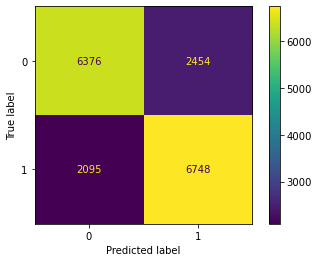

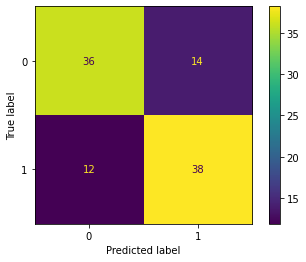

In [181]:
y_pred=lg.predict(X_val)
print(f'Val prediction: {y_pred}')
print(f'Val RMSE: {mean_squared_error(Y_val, y_pred,squared=False)}')
print(f'Val AUC: {roc_auc_score(Y_val,y_pred)}')

y_predTest=lg.predict(X_test)
print(f'Test prediction: {y_predTest}')
print(f'Test RMSE: {mean_squared_error(Y_test, y_predTest,squared=False)}')
print(f'Test AUC: {roc_auc_score(Y_test, y_predTest)}') 

y_predTrain=lg.predict(X_train)
print(f'Train prediction: {y_predTrain}')
print(f'Train RMSE: {mean_squared_error(Y_train, y_predTrain,squared=False)}')
print(f'Train AUC: {roc_auc_score(Y_train,y_predTrain)}')

cm = confusion_matrix(Y_val, y_pred)
cmprob = np.round(100 * cm / len(Y_val), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(Y_val, y_pred))
print(classification_report_imbalanced(Y_val, y_pred))

C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Val prediction: [1. 1. 1. ... 1. 1. 1.]
Val RMSE: 0.9260329662365817
Val AUC: 0.5
#######
Test prediction: [1. 1. 1. ... 1. 1. 1.]
Test RMSE: 0.9260223240755154
Test AUC: 0.5
#######
Train prediction: [1. 1. 1. ... 1. 1. 1.]
Train RMSE: 0.9282835187487117
Train AUC: 0.5
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     54385
         1.0       0.14      1.00      0.25      9035

    accuracy                           0.14     63420
   macro avg       0.07      0.50      0.12     63420
weighted avg       0.02      0.14      0.04     63420

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.00      0.00      1.00      0.00      0.00      0.00     54385
        1.0       0.14      1.00      0.00      0.25      0.00      0.00      9035

avg / total       0.02      0.14      0.86      0.04      0.00      0.00     63420



C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MacCasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MacCasa\anaconda3\lib\site-packages\skle

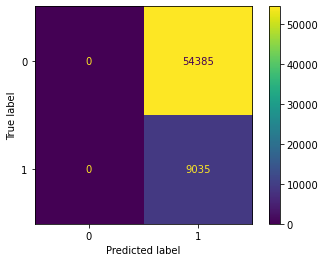

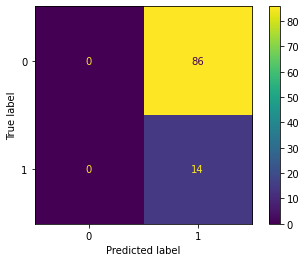

In [174]:
y_pred=lg.predict(dfVal)
print(f'Val prediction: {y_pred}')
print(f'Val RMSE: {mean_squared_error(yVal, y_pred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal, y_pred)}')
print('#######')
y_Testpred=lg.predict(dfTest)
print(f'Test prediction: {y_Testpred}')
print(f'Test RMSE: {mean_squared_error(yTest, y_Testpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, y_Testpred)}')
print('#######')
y_predTrain=lg.predict(dfTrain)
print(f'Train prediction: {y_predTrain}')
print(f'Train RMSE: {mean_squared_error(yTrain, y_predTrain,squared=False)}')
print(f'Train AUC: {roc_auc_score(yTrain,y_predTrain)}')

cm = confusion_matrix(yVal, y_pred)
cmprob = np.round(100 * cm / len(yVal), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(yVal, y_pred))
print(classification_report_imbalanced(yVal, y_pred))

In [ ]:
from sklearn.datasets import load_iris
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.svm import LinearSVC
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.pipeline import make_pipeline
>>> from sklearn.ensemble import StackingClassifier
>>> X, y = load_iris(return_X_y=True)

In [ ]:
estimators = [
...     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
...     ('svr', make_pipeline(StandardScaler(),
...                           LinearSVC(random_state=42)))
... ]

In [ ]:
estimators = [
...     ('rf1', RandomForestClassifier(n_estimators=10, max_depth=20, random_state=42)),
...     ('rf2', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=45))
... ]

In [ ]:
clf = StackingClassifier(
...     #estimators=estimators, final_estimator=LogisticRegression()
        estimators=estimators, final_estimator=RandomForestClassifier()
... )

In [ ]:
from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, stratify=y, random_state=42
... )
>>> clf.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
clf.get_params

In [ ]:
from sklearn.svm import SVC
>>> from sklearn.ensemble import BaggingClassifier
>>> from sklearn.datasets import make_classification
>>> X, y = make_classification(n_samples=100, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
>>> clf = BaggingClassifier(base_estimator=SVC(),
...                         n_estimators=10, random_state=0).fit(X, y)
>>> clf.predict([[0, 0, 0, 0]])

In [ ]:
pd.DataFrame(y).value_counts()